In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
np.random.seed(7) # seeding random number generator

df = pd.read_csv('review.csv')
print(df.head())

       reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                     Rick Bennette "Rick Bennette"    [1, 1]   
3                         RustyBill "Sunday Rocker"    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...        5   
1  The product does exactly as it should and is q...        5   
2  The primary job of this device is to block the...        5   
3  Nice windscreen protects my MXL mic and preven...        5   
4  This pop filter is great. It looks and perform...        5   

                   

In [6]:
data = df.copy()
data.describe()

,overall,unixReviewTime
count,10261.000000,1.026100e+04
mean,4.488744,1.360606e+09
std,0.894642,3.779735e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343434e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10254 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


In [8]:
data["asin"].unique()

array(['1384719342', 'B00004Y2UT', 'B00005ML71', 'B000068NSX',
       'B000068NTU', 'B000068NVI', 'B000068NW5', 'B000068NZC',
       'B000068NZG', 'B000068O1N', 'B000068O3D', 'B000068O3X',
       'B000068O4H', 'B000068O59', 'B00006LVEU', 'B00009W40D',
       'B00009W40G', 'B0000AQRSR', 'B0000AQRSS', 'B0000AQRST',
       'B0000AQRSU', 'B000165DSM', 'B0001FTVD6', 'B0002BACB4',
       'B0002CZR3G', 'B0002CZSJO', 'B0002CZSJY', 'B0002CZST4',
       'B0002CZT0M', 'B0002CZTIO', 'B0002CZUTM', 'B0002CZUUG',
       'B0002CZV46', 'B0002CZV78', 'B0002CZV7I', 'B0002CZV82',
       'B0002CZVA0', 'B0002CZVB4', 'B0002CZVBE', 'B0002CZVHI',
       'B0002CZVI2', 'B0002CZVK0', 'B0002CZVW8', 'B0002CZVWS',
       'B0002CZVXM', 'B0002CZVZK', 'B0002CZW0Y', 'B0002CZZW4',
       'B0002D0096', 'B0002D01IG', 'B0002D01K4', 'B0002D01KO',
       'B0002D01PY', 'B0002D02IU', 'B0002D02RQ', 'B0002D05FU',
       'B0002D070I', 'B0002D0B4K', 'B0002D0C1C', 'B0002D0CA8',
       'B0002D0CAI', 'B0002D0CEO', 'B0002D0CGC', 'B0002

In [9]:
asins_unique = len(data["asin"].unique())
print("Number of Unique ASINs: " + str(asins_unique))

Number of Unique ASINs: 900


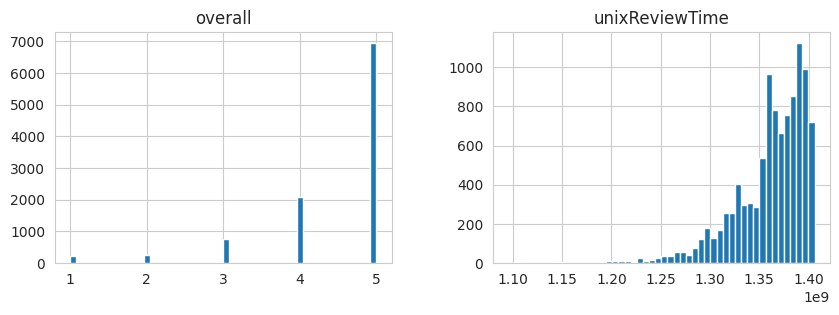

In [10]:
data.hist(bins=50, figsize=(10,3))
plt.show()

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
dataAfter = data.dropna(subset=["overall"])
# Removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["overall"] = dataAfter["overall"].astype(int)


Before 10261
After 10261


In [12]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter,
                                           dataAfter["overall"]):
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)
print(len(strat_train))
print(len(strat_test))
print(strat_test["overall"].value_counts()/len(strat_test))

8208
2053
5    0.676084
4    0.203117
3    0.075499
2    0.024355
1    0.020945
Name: overall, dtype: float64


In [13]:
reviews = strat_train.copy()
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
717,ADH0O8UVJOT10,B0002D02RQ,StormJH1,"[0, 0]",Didn't think I'd be compelled to review someth...,5,My new pick-of-choice (replacing the Dunlop Or...,1380067200,"09 25, 2013"
5571,A12P4A1OC41KUO,B000SJJCX4,"zxrslant ""zxrslant""","[1, 1]",thing works fine... easy to understand setting...,4,no problems here,1368057600,"05 9, 2013"
4320,A8L6Z9U1TCP06,B000BW2D84,Perry D,"[0, 0]",Very good quality cable and plugs. Easy to mak...,5,Custom Cables at a low price,1356480000,"12 26, 2012"
952,A1NNBJRXPIDA12,B0002D0COE,"B Perry ""bnb books""","[1, 1]",Planet Waves humidifiers are simple to use and...,5,Insurance Against Damage from Dryness,1366502400,"04 21, 2013"
4599,A1H55L0BLPCWYF,B000EEJJI6,"Amazon Customer ""j allen""","[0, 0]",This is a pretty good deal if you look at the ...,5,great deal,1305676800,"05 18, 2011"


In [14]:
print(len(reviews["reviewerName"].unique()), len(reviews["asin"].unique()))
print(reviews.info())
print(reviews.groupby("asin")["reviewerName"].unique())

1397 900
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8208 entries, 717 to 9817
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      8208 non-null   object
 1   asin            8208 non-null   object
 2   reviewerName    8185 non-null   object
 3   helpful         8208 non-null   object
 4   reviewText      8203 non-null   object
 5   overall         8208 non-null   int64 
 6   summary         8208 non-null   object
 7   unixReviewTime  8208 non-null   int64 
 8   reviewTime      8208 non-null   object
dtypes: int64(2), object(7)
memory usage: 641.2+ KB
None
asin
1384719342    [Jake, RustyBill "Sunday Rocker", SEAN MASLANK...
B00004Y2UT                                 [Brian, Kurt Robair]
B00005ML71    [Wilhelmina Zeitgeist "coolartsybabe", Christo...
B000068NSX             [GunHawk, Ricky Shows, MetalFan, Charlo]
B000068NTU    [Ann Vande Zande, Michael Hassey, Amazon Custo...
                 

4.4886695906432745


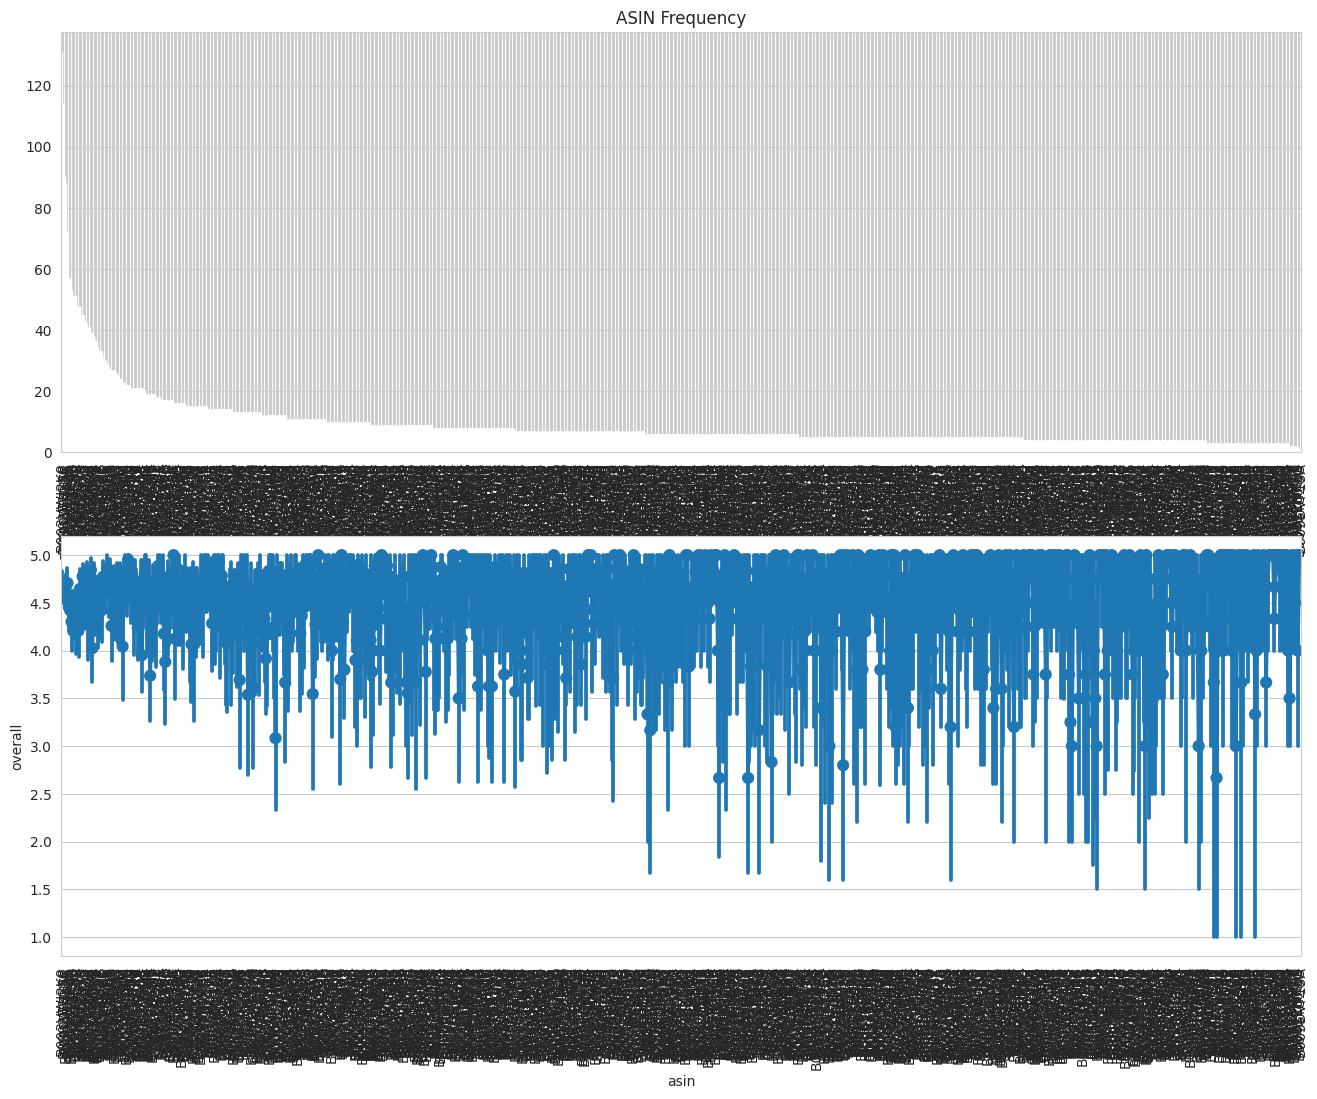

In [15]:
print(reviews["overall"].mean())

asins_count_ix = reviews["asin"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asin"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asin", y="overall", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

In [19]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["overall"].apply(sentiments)
strat_test["Sentiment"] = strat_test["overall"].apply(sentiments)
print(strat_test["Sentiment"])

4356    Positive
8091    Negative
7744    Positive
8806    Positive
3125    Positive
          ...   
3034    Positive
4630    Positive
3145    Negative
7074    Positive
7914    Positive
Name: Sentiment, Length: 2053, dtype: object
